In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# if any column contains null values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# checking if any of the rows are duplicated
duplicates = df.duplicated()
df[duplicates]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [15]:
# removing duplicate rows
df = df.drop_duplicates()

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
# checking descriptive statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
# checking unique values in quality
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# EDA

In [21]:
grey_palette = sns.color_palette(['#AAAAB6','#B79EBC','#9C7DA1','#A46D87','#DEB8AD','#EDD8BB'])
sns.set_palette(grey_palette)

<Axes: >

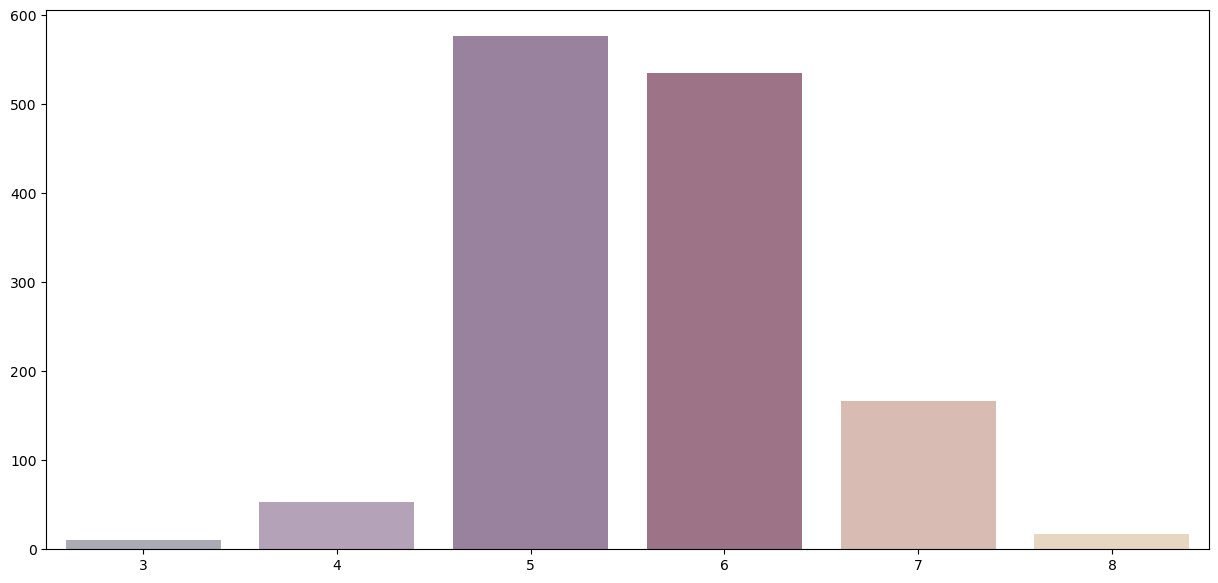

In [23]:
plt.figure(figsize = (15, 7))
sns.barplot(x = df['quality'].value_counts().index, y = df['quality'].value_counts().values)

# Fixed Acidity and Quality

Correlation between fixed acidity and quality is 0.11902366561349777
Skewness of the fixed column is 0.9410413664561449


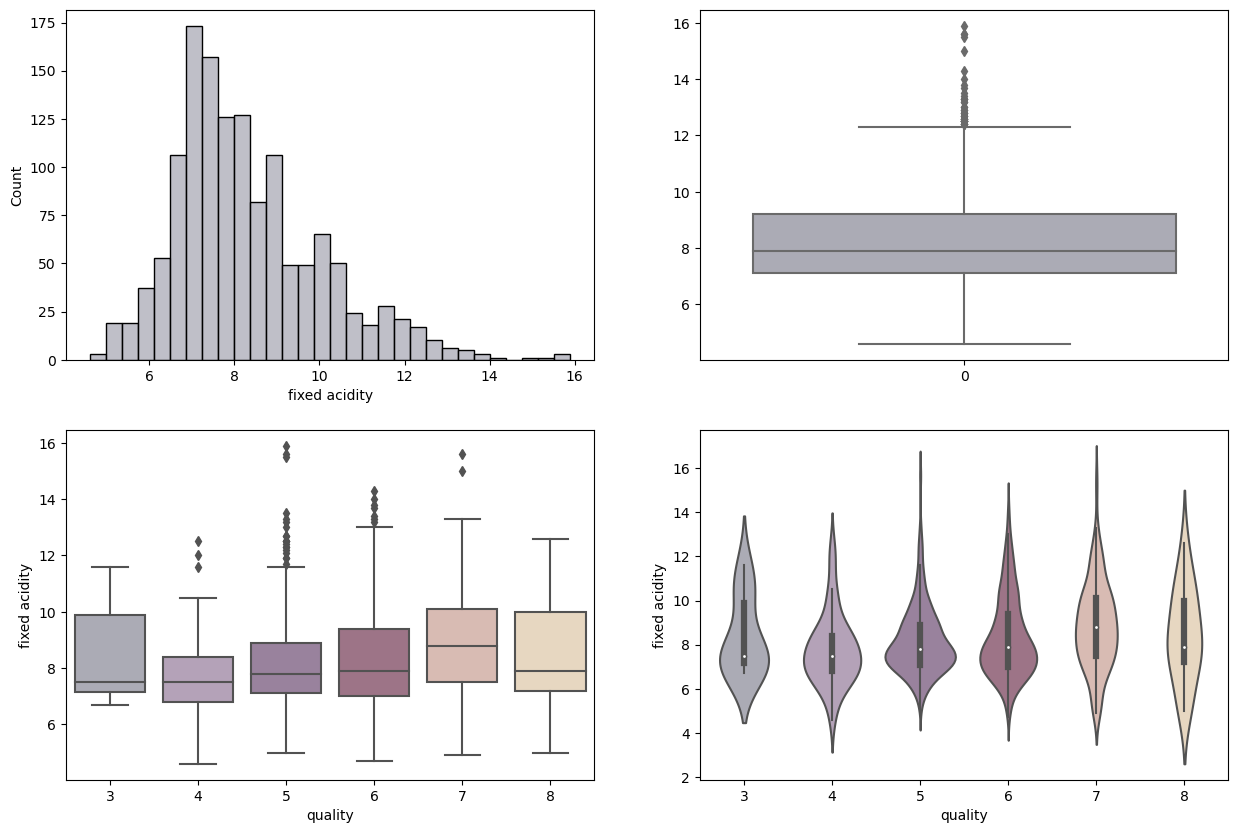

In [27]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.histplot(x = df['fixed acidity'])
plt.subplot(2, 2, 2)
sns.boxplot(df['fixed acidity'])
plt.subplot(2, 2, 3)
sns.boxplot(x = df['quality'],y = df['fixed acidity'])
plt.subplot(2, 2, 4)
sns.violinplot(x = df['quality'], y = df['fixed acidity'])
print('Correlation between fixed acidity and quality is', df['quality'].corr(df['fixed acidity']))
print('Skewness of the fixed column is', df['fixed acidity'].skew())

1. There are some outliers in the 'fixed acidity' column as the distribution is positively skewed
2. There is not much correlation between quality and fixed acidity

# Volatile Acidity and Quality

Correlation between volatile acidity and quality is -0.39521368900984094
Skewness of the volatile acidity column is 0.7292789463991854


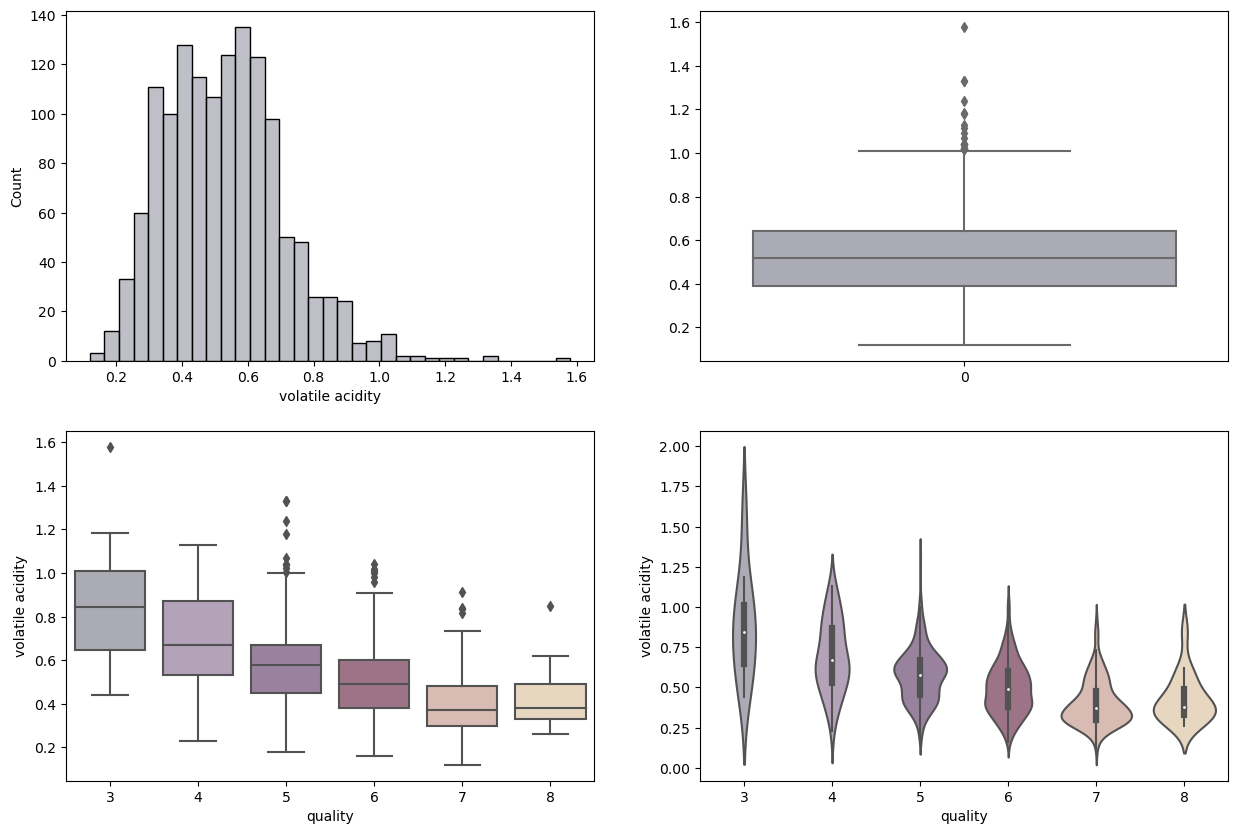

In [29]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.histplot(x = df['volatile acidity'])
plt.subplot(2, 2, 2)
sns.boxplot(df['volatile acidity'])
plt.subplot(2, 2, 3)
sns.boxplot(x = df['quality'], y = df['volatile acidity'])
plt.subplot(2, 2, 4)
sns.violinplot(x = df['quality'], y = df['volatile acidity'])
print('Correlation between volatile acidity and quality is', df['quality'].corr(df['volatile acidity']))
print('Skewness of the volatile acidity column is', df['volatile acidity'].skew())

1. 7th and 8th quality mostly overlap
2. Negative correlation between volatile acidity and quality
3. Lesser the value of volatile acidity, more the chances of wine to be of good quality

# Citric Acid and Quality

Correlation between citric acid and quality is 0.2280574591992998
Skewness of the citric acid column is 0.31272554238899036


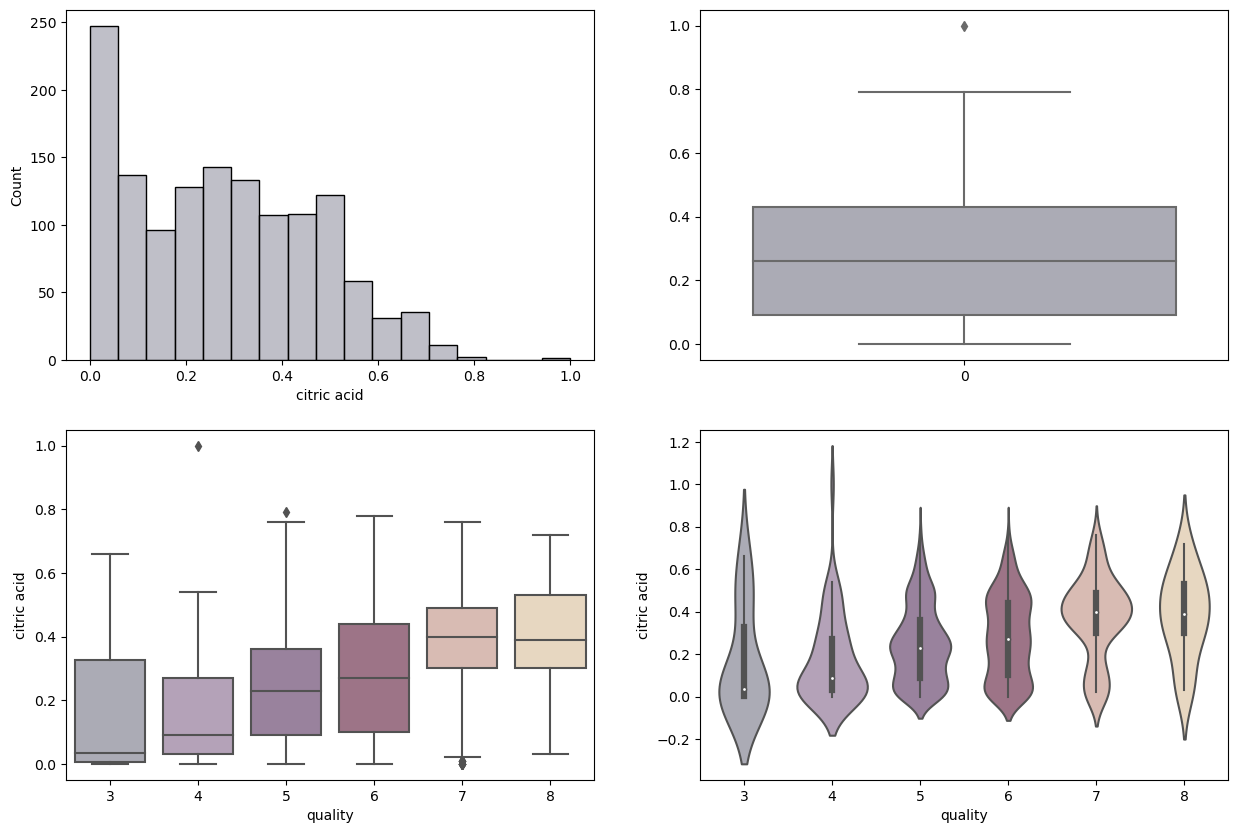

In [35]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['citric acid'])
plt.subplot(2, 2, 2)
sns.boxplot(df['citric acid'])
plt.subplot(2, 2, 3)
sns.boxplot(x = df['quality'], y = df['citric acid'])
plt.subplot(2, 2, 4)
sns.violinplot(x = df['quality'], y = df['citric acid'])
print('Correlation between citric acid and quality is', df['citric acid'].corr(df['quality']))
print('Skewness of the citric acid column is', df['citric acid'].skew())

1. Following normal distribution
2. Positive correlation between citric acid and quality
3. Higher the content of citric acid more the chances of quality to be of good
4. Not skewed

# Residual Sugar and Quality

Correlation between residual sugar and quality is 0.013640470048445891
Skewness of the residual sugar column is 4.548153403940447


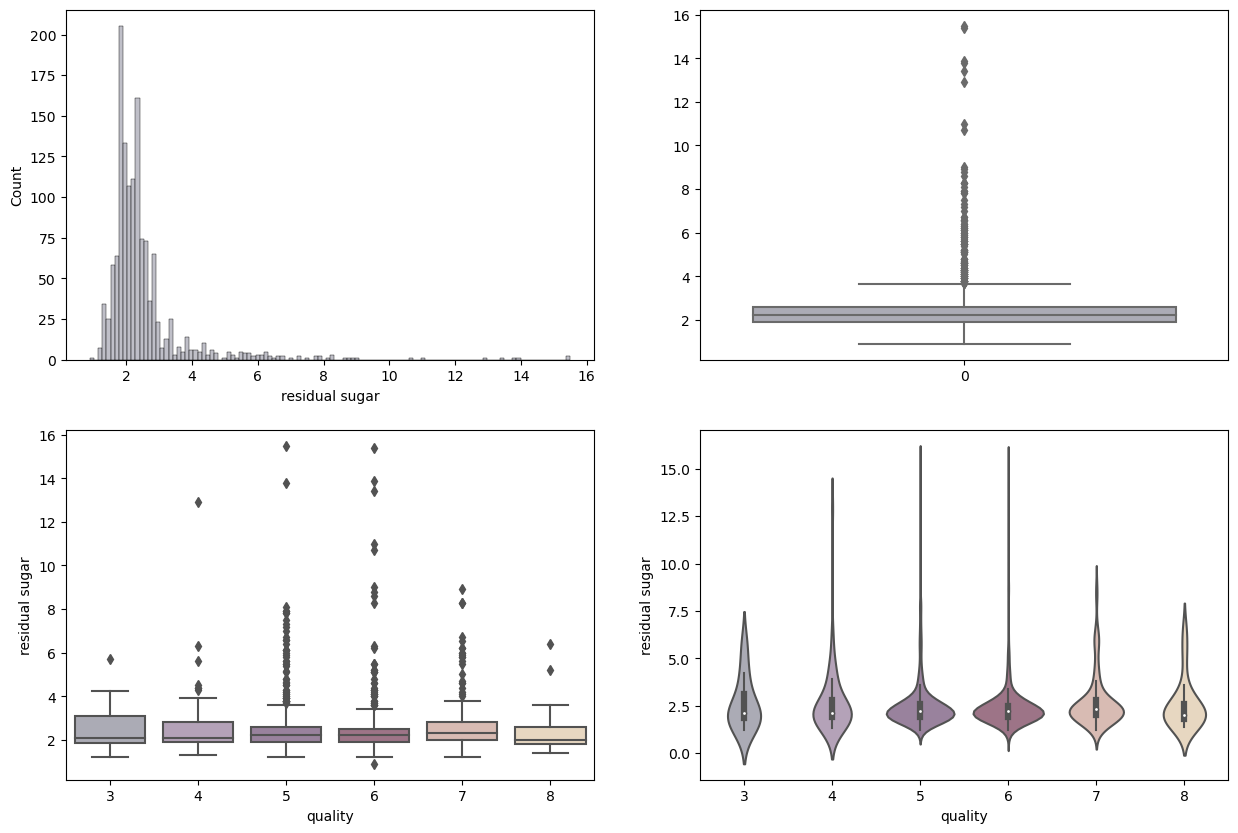

In [37]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['residual sugar'])
plt.subplot(2, 2, 2)
sns.boxplot(df['residual sugar'])
plt.subplot(2, 2, 3)
sns.boxplot(x = df['quality'], y = df['residual sugar'])
plt.subplot(2, 2, 4)
sns.violinplot(x = df['quality'], y = df['residual sugar'])
print('Correlation between residual sugar and quality is', df['residual sugar'].corr(df['quality']))
print('Skewness of the residual sugar column is', df['residual sugar'].skew())

1. Highly skewed
2. No correlation between residual sugar and quality
3. Most wine has sugar level less than 3

# Chlorides and Quality

Correlation between chlorides and quality is -0.13098841286642673
Skewness of the chlorides column is 5.502487294623722


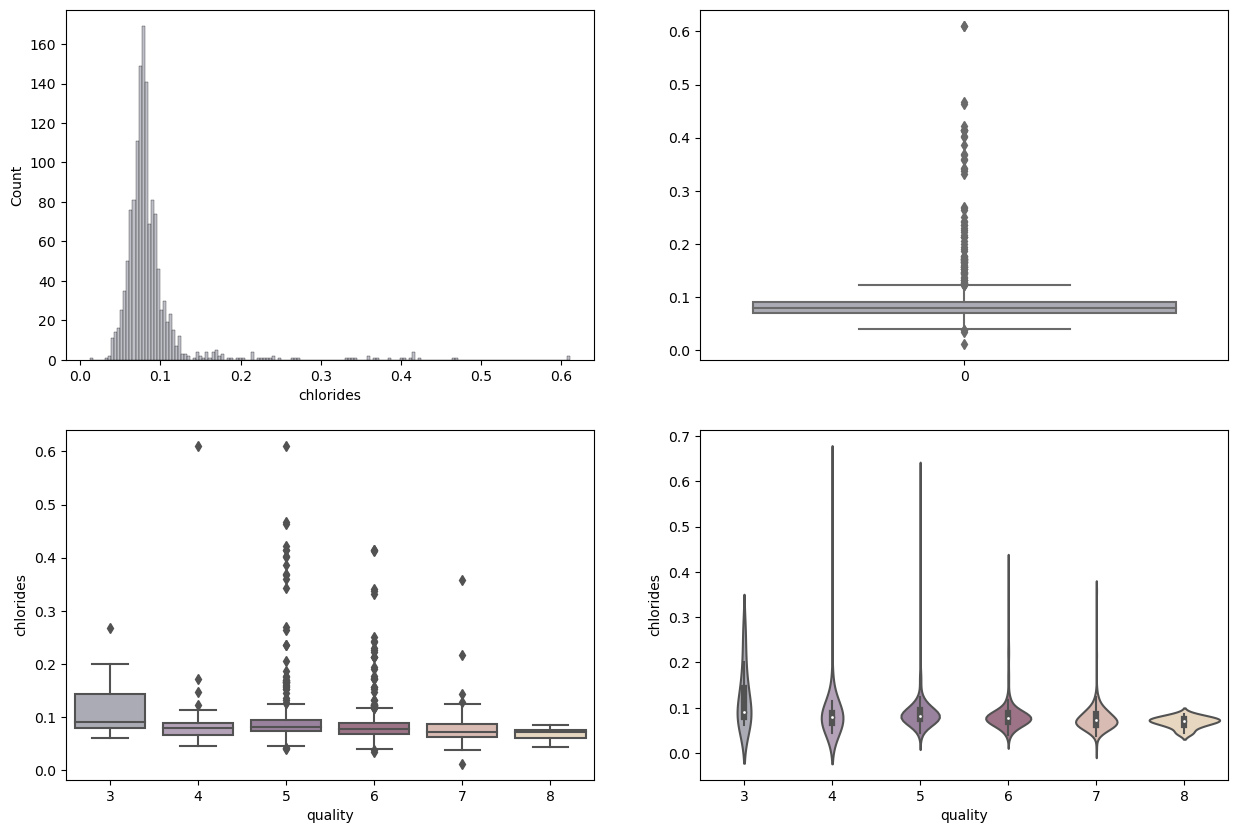

In [39]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['chlorides'])
plt.subplot(2, 2, 2)
sns.boxplot(df['chlorides'])
plt.subplot(2, 2, 3)
sns.boxplot(x = df['quality'], y = df['chlorides'])
plt.subplot(2, 2, 4)
sns.violinplot(x = df['quality'], y = df['chlorides'])
print('Correlation between chlorides and quality is', df['chlorides'].corr(df['quality']))
print('Skewness of the chlorides column is', df['chlorides'].skew())

1. Highly skewed
2. Chloride level of most of wine is less than 0.1
3. Not much correlation between chlorides and quality of column

# Free Sulphur Dioxide and Quality

Correlation between free sulfur dioxide and quality is -0.0504627668050258
Skewness of the free sulfur dioxide column is 1.2265794991760643


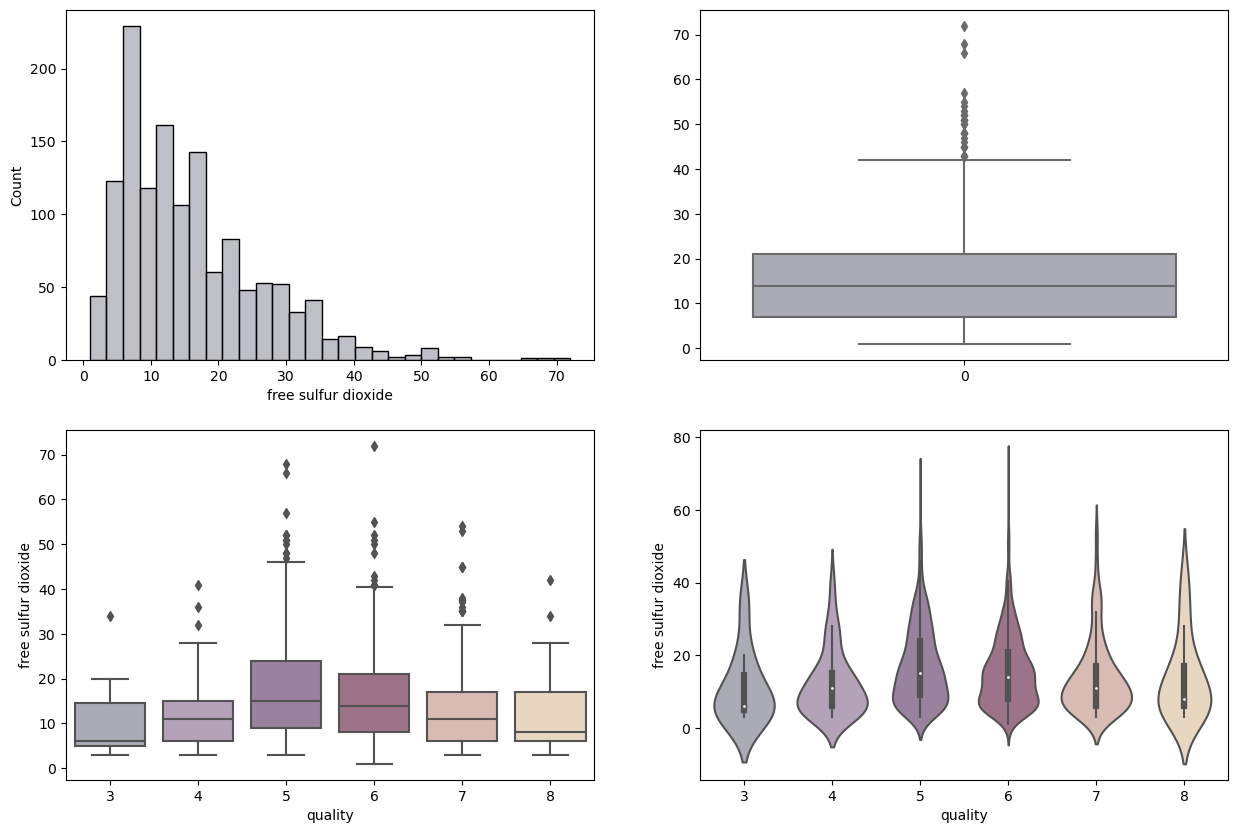

In [43]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['free sulfur dioxide'])
plt.subplot(2, 2, 2)
sns.boxplot(df['free sulfur dioxide'])
plt.subplot(2, 2, 3)
sns.boxplot(x = df['quality'], y = df['free sulfur dioxide'])
plt.subplot(2, 2, 4)
sns.violinplot(x = df['quality'], y = df['free sulfur dioxide'])
print('Correlation between free sulfur dioxide and quality is', df['free sulfur dioxide'].corr(df['quality']))
print('Skewness of the free sulfur dioxide column is', df['free sulfur dioxide'].skew())

1. Positively skewed
2. Not much correlation between free sulfur dioxide and quality

# Total Sulfur Dioxide

Correlation between total sulfur dioxide and quality is -0.177855365680296
Skewness of the total sulfur dioxide column is 1.5403680777213933


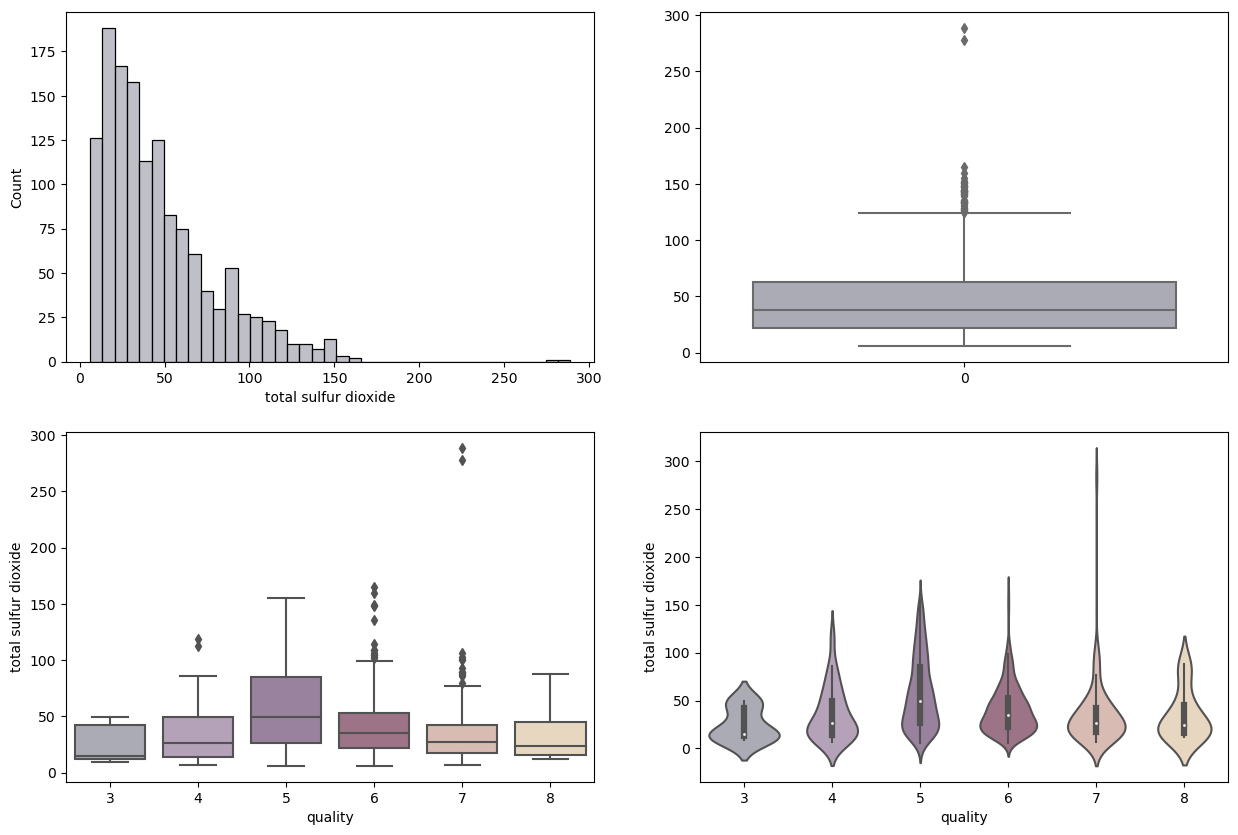

In [45]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['total sulfur dioxide'])
plt.subplot(2, 2, 2)
sns.boxplot(df['total sulfur dioxide'])
plt.subplot(2, 2, 3)
sns.boxplot(x = df['quality'], y = df['total sulfur dioxide'])
plt.subplot(2, 2, 4)
sns.violinplot(x = df['quality'], y = df['total sulfur dioxide'])
print('Correlation between total sulfur dioxide and quality is', df['total sulfur dioxide'].corr(df['quality']))
print('Skewness of the total sulfur dioxide column is', df['total sulfur dioxide'].skew())

1. Right skewed
2. Not correlation between total sulfur dioxide and quality

# Density and Quality

Correlation between density and quality is -0.1842516501190241
Skewness of the density column is 0.04477785573116107


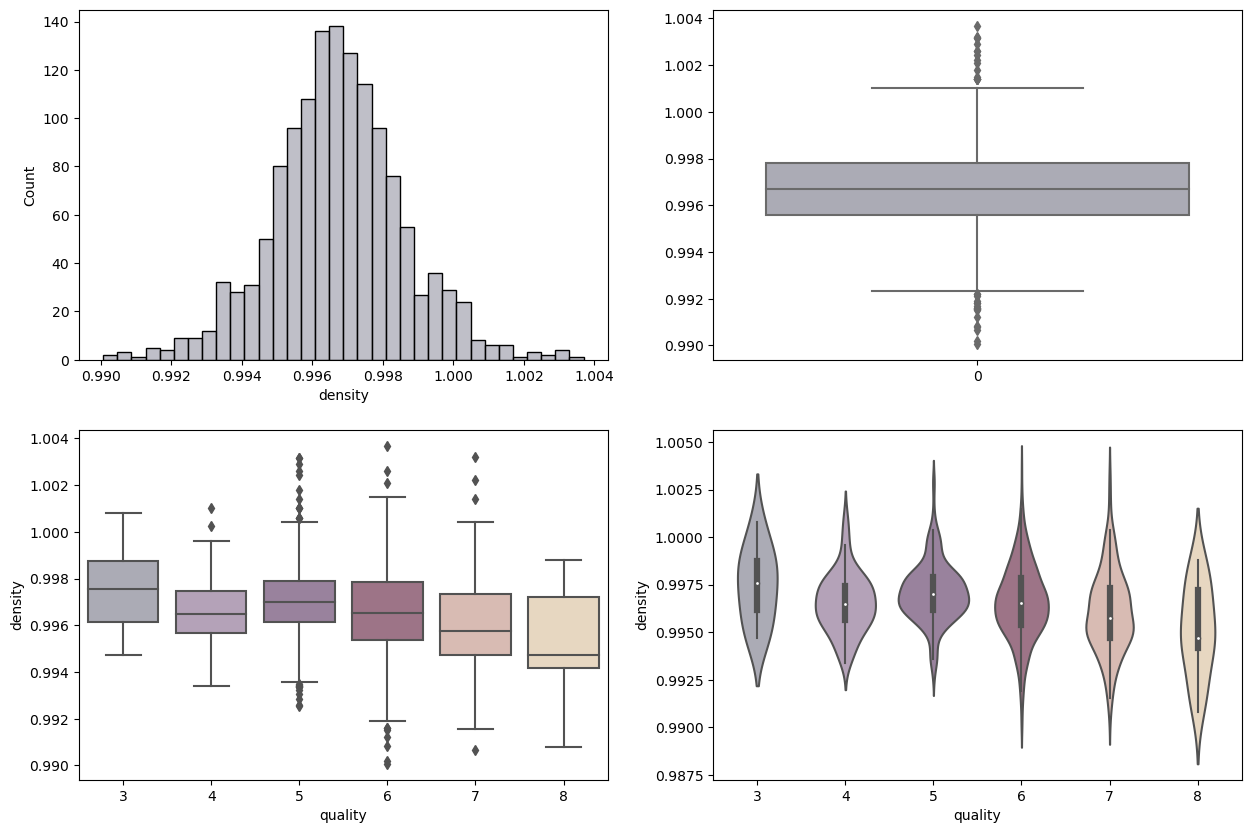

In [47]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['density'])
plt.subplot(2, 2, 2)
sns.boxplot(df['density'])
plt.subplot(2, 2, 3)
sns.boxplot(x = df['quality'], y = df['density'])
plt.subplot(2, 2, 4)
sns.violinplot(x = df['quality'], y = df['density'])
print('Correlation between density and quality is', df['density'].corr(df['quality']))
print('Skewness of the density column is', df['density'].skew())

1. Normally distributed
2. Lower the density better the quality of wine

# pH and Quality

Correlation between pH and quality is -0.05524511495867186
Skewness of the pH column is 0.2320322752014824


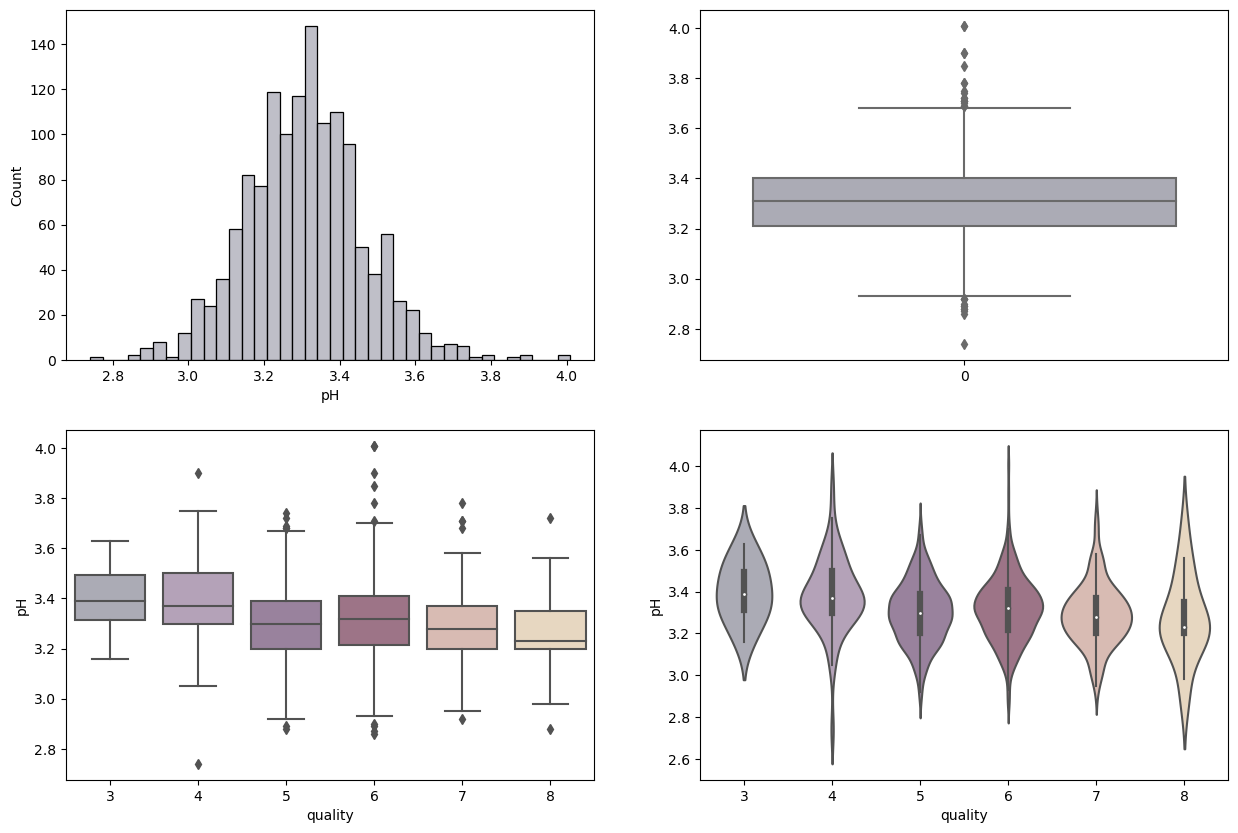

In [49]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['pH'])
plt.subplot(2, 2, 2)
sns.boxplot(df['pH'])
plt.subplot(2, 2, 3)
sns.boxplot(x = df['quality'], y = df['pH'])
plt.subplot(2, 2, 4)
sns.violinplot(x = df['quality'], y = df['pH'])
print('Correlation between pH and quality is', df['pH'].corr(df['quality']))
print('Skewness of the pH column is', df['pH'].skew())

1. Normally distributed
2. No correlation between pH and quality

# Sulphates and Quality

Correlation between sulphates and quality is 0.24883513557788833
Skewness of the sulphates column is 2.4065046145674196


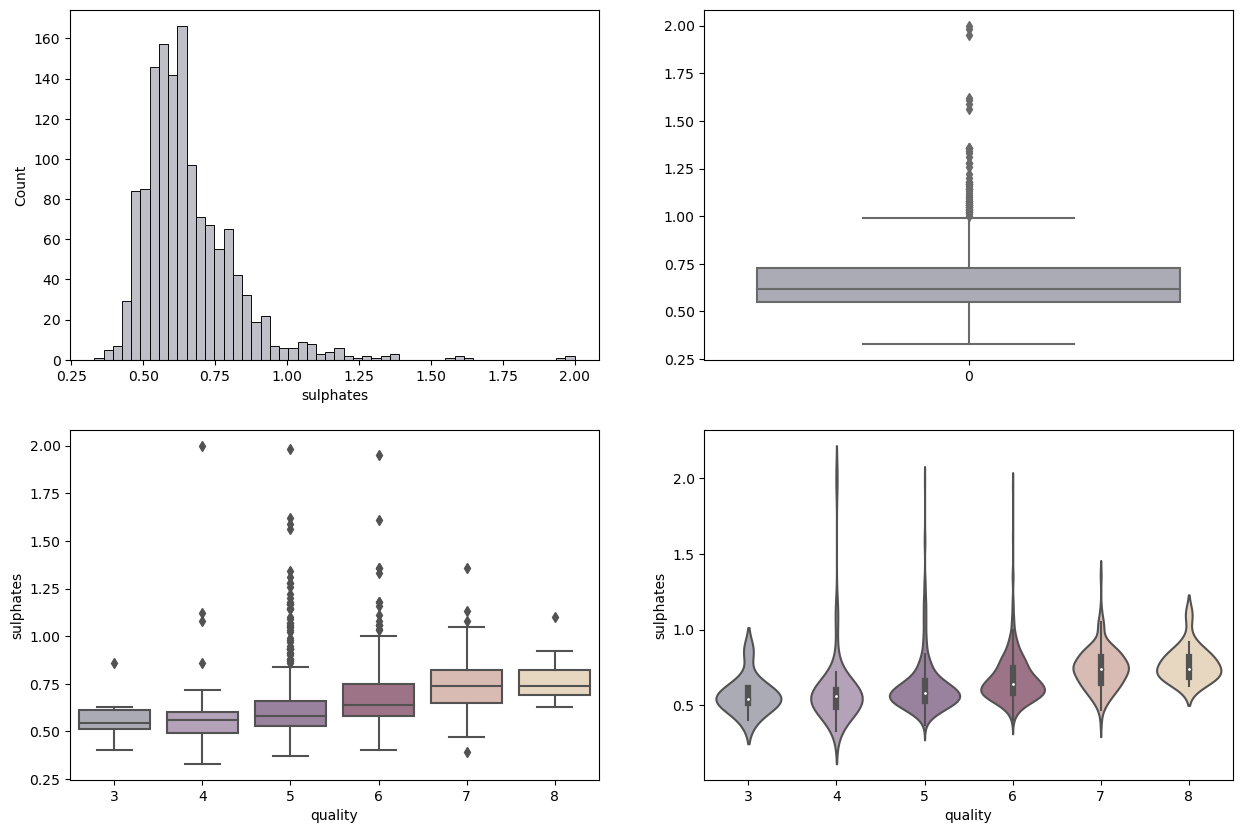

In [51]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['sulphates'])
plt.subplot(2, 2, 2)
sns.boxplot(df['sulphates'])
plt.subplot(2, 2, 3)
sns.boxplot(x = df['quality'], y = df['sulphates'])
plt.subplot(2, 2, 4)
sns.violinplot(x = df['quality'], y = df['sulphates'])
print('Correlation between sulphates and quality is', df['sulphates'].corr(df['quality']))
print('Skewness of the sulphates column is', df['sulphates'].skew())

1. Positively skewed
2. Positive correlation between sulphates and quality
3. Higher the content of sulphates the more chances of wine to be good

Correlation between alcohol and quality is 0.4803428980019916
Skewness of the alcohol column is 0.8598411692032926


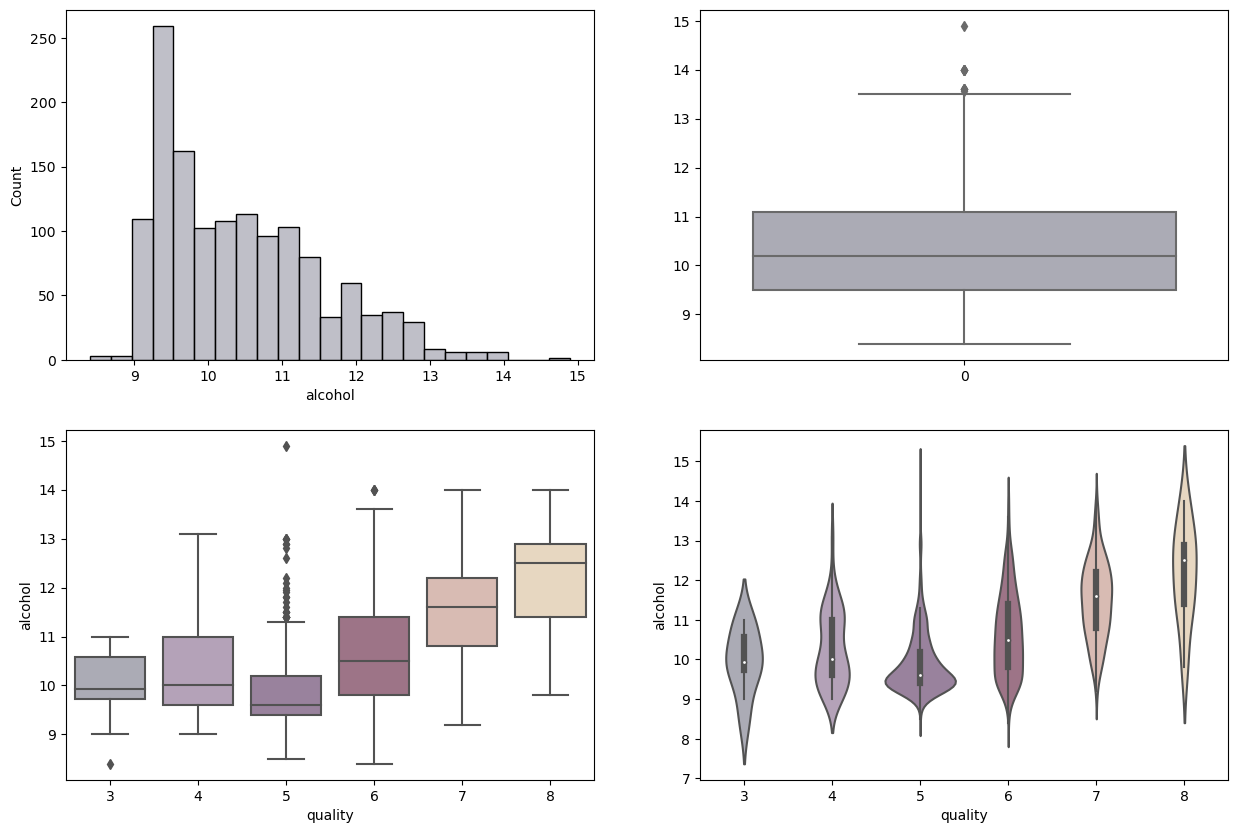

In [53]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['alcohol'])
plt.subplot(2, 2, 2)
sns.boxplot(df['alcohol'])
plt.subplot(2, 2, 3)
sns.boxplot(x = df['quality'], y = df['alcohol'])
plt.subplot(2, 2, 4)
sns.violinplot(x = df['quality'], y = df['alcohol'])
print('Correlation between alcohol and quality is', df['alcohol'].corr(df['quality']))
print('Skewness of the alcohol column is', df['alcohol'].skew())

1. Almost normally distributed
2. High positive correlation between alcohol and wine quality
3. More the content of alcohol, more the chances of wine to be good quality

# Correlation heatmap

<Axes: >

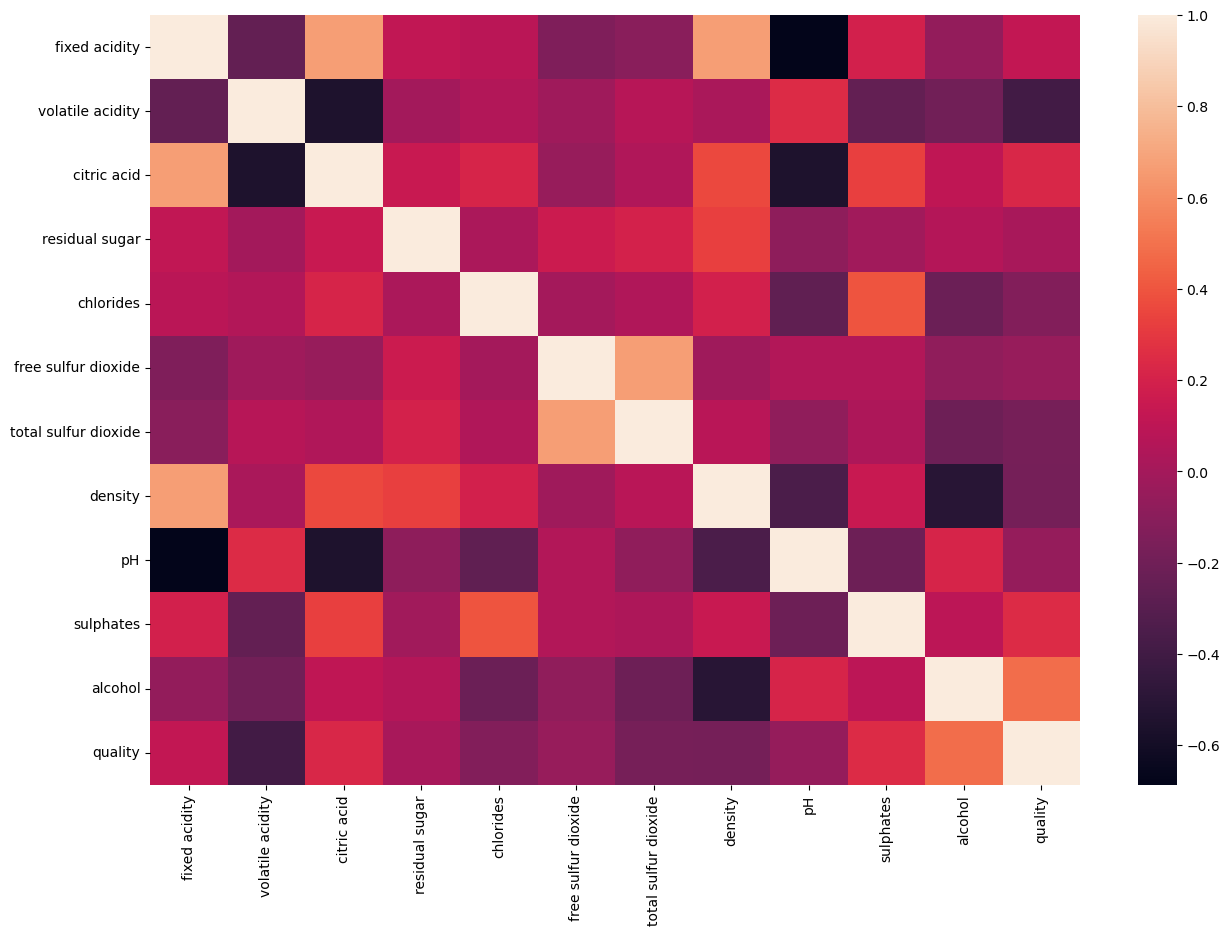

In [54]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr())

1. More the content of Citric Acid, higher fixed acidity is
2. Lesser value in pH, more in acidity
3. Higher the density of the wine more acidic the wine is
4. More the content of the alcohol, lower the density is
5. There  is some positive correlation between the sulphate and chloride content of the wine.
6. More the citric acid the higher is the acidity and that makes the density high.
7. Total sulphur dioxide is highly correlated with free sulphur dioxide.

# Citric acid, Fixed acidity and Quality

<Axes: xlabel='citric acid', ylabel='fixed acidity'>

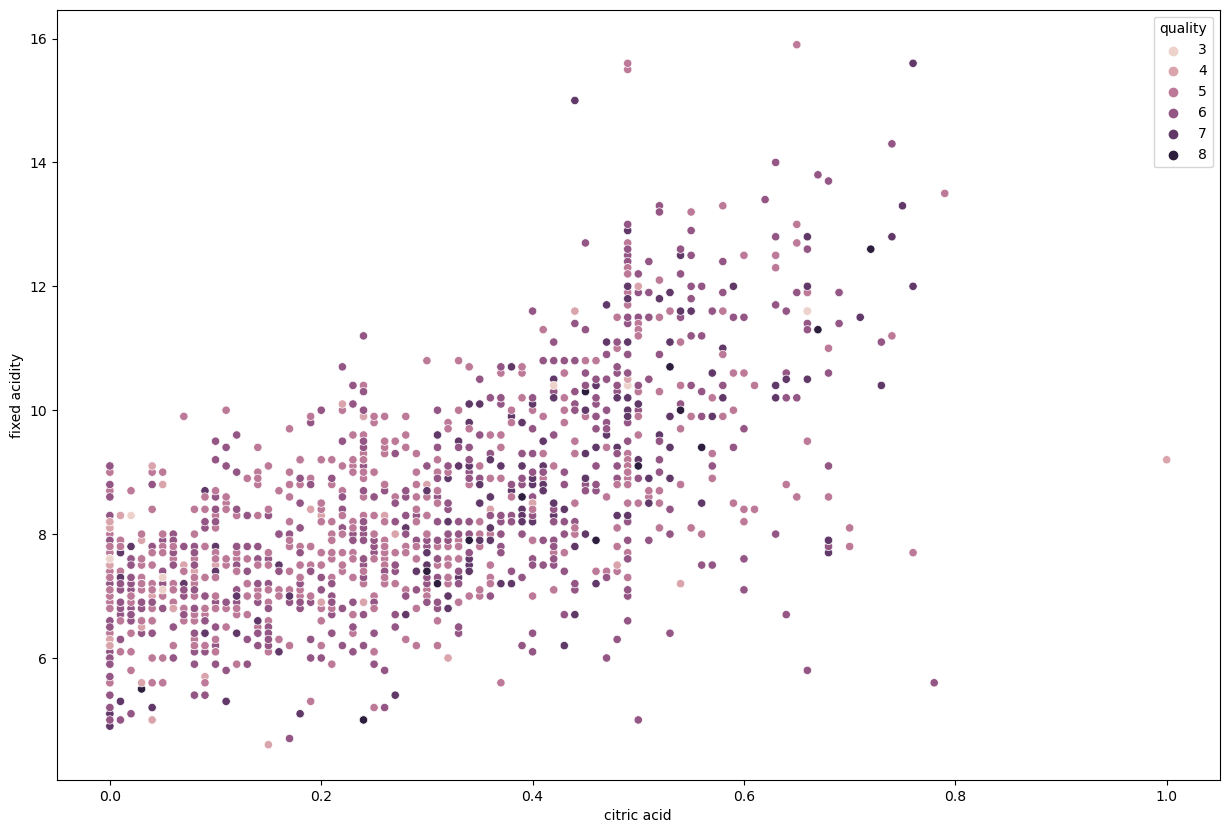

In [58]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = df['citric acid'], y = df['fixed acidity'], hue = df['quality'],)

there is some kind of linear relatioship between citric acid and acidity.
Higher content of citric acid causes increase in acidity of the wine.
Most of the best wine are those who have higher content of citric acid.

# Density, Fixed acidity and Quality

<Axes: xlabel='density', ylabel='fixed acidity'>

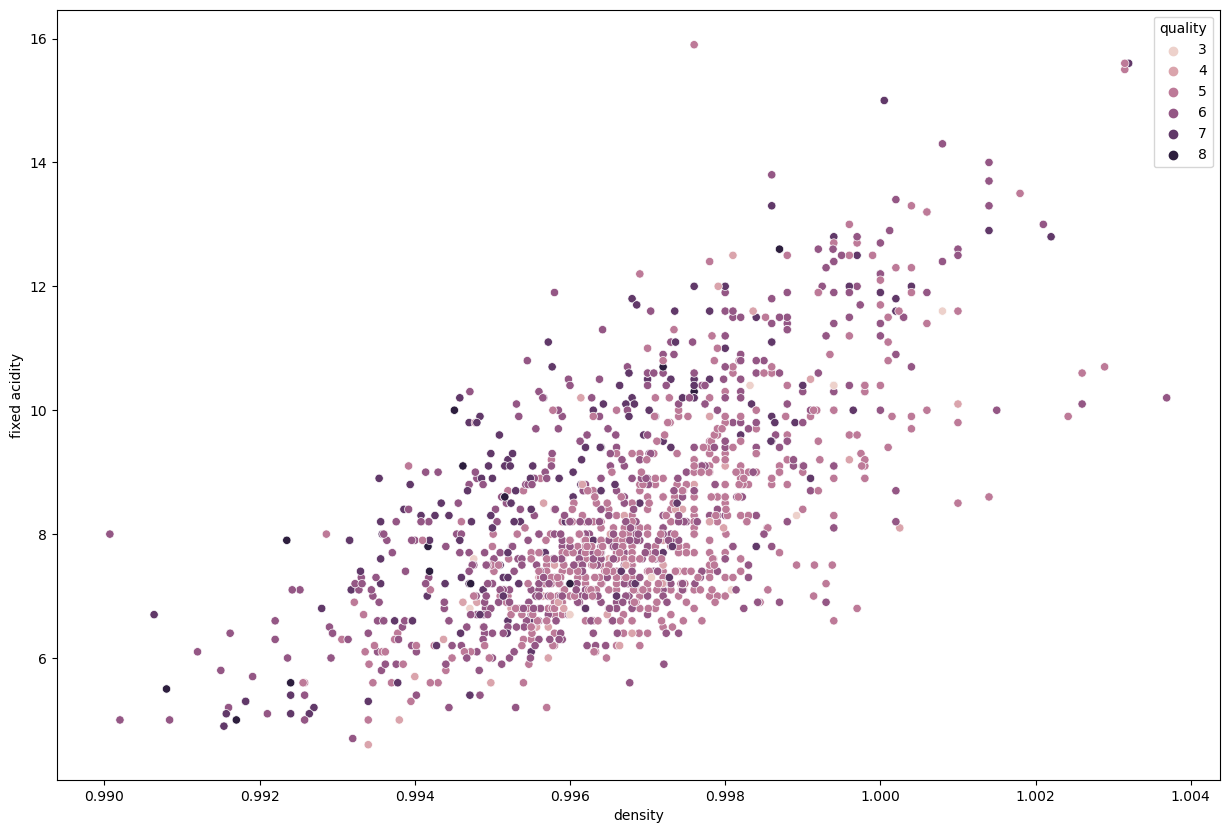

In [59]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x=df['density'], y=df['fixed acidity'], hue=df['quality'])

Linear relation between acidty and density

# Density, Alcohol and Quality

<Axes: xlabel='density', ylabel='alcohol'>

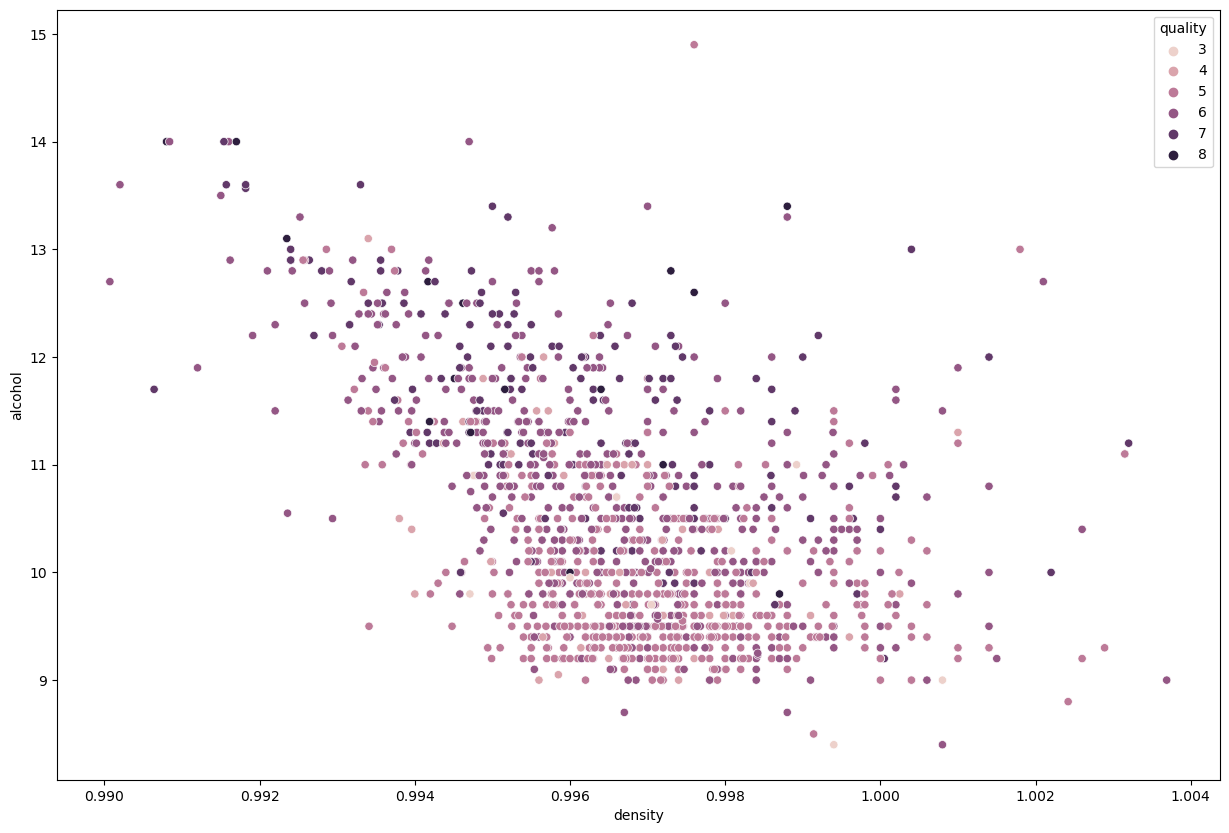

In [61]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x=df['density'], y=df['alcohol'],hue=df['quality'])

Inverse correlation between alcohol content and density.
All the good wine have high alcohol content with low density

In [62]:
df.shape

(1359, 12)

# Removing Outliers

In [64]:
from scipy import stats
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes!='object'].index]))
df = df[(z<3).all(axis=1)]
#removing data points that are within more than 3(including) standard deviations from the mean

In [67]:
X = df.drop('quality', axis = 1)
y = df['quality']
X.shape

(1120, 11)

<Axes: xlabel='quality', ylabel='count'>

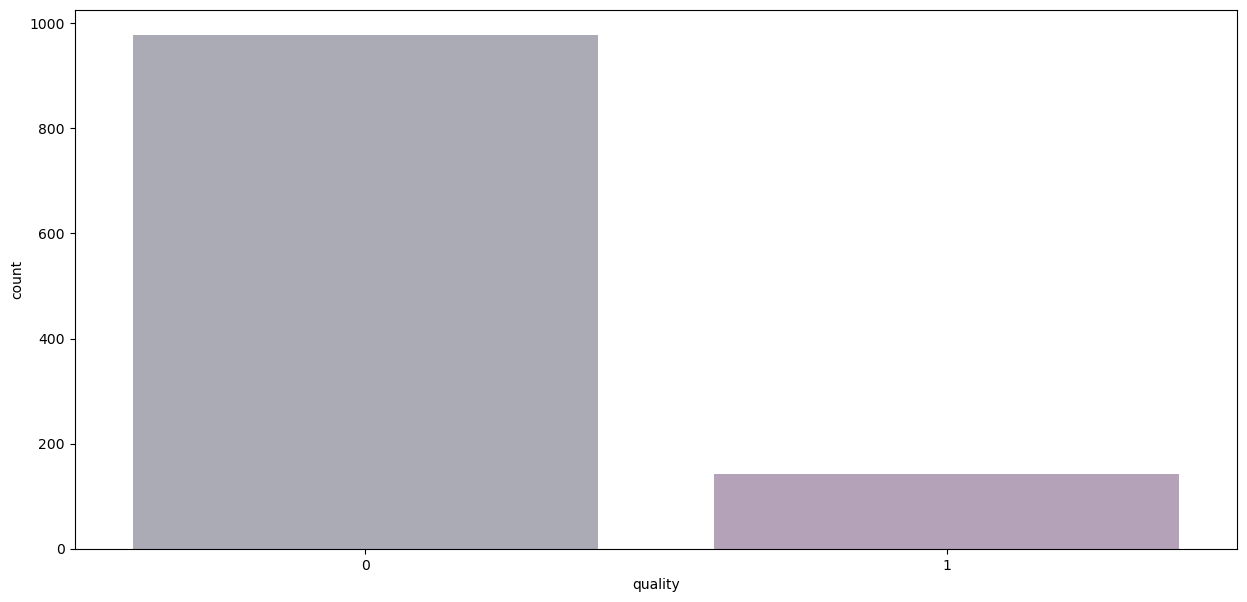

In [68]:
y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
plt.figure(figsize=(15,7))
sns.countplot(x=y)

# Handling Imbalance Classes

In [69]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X,y)

<Axes: xlabel='quality', ylabel='count'>

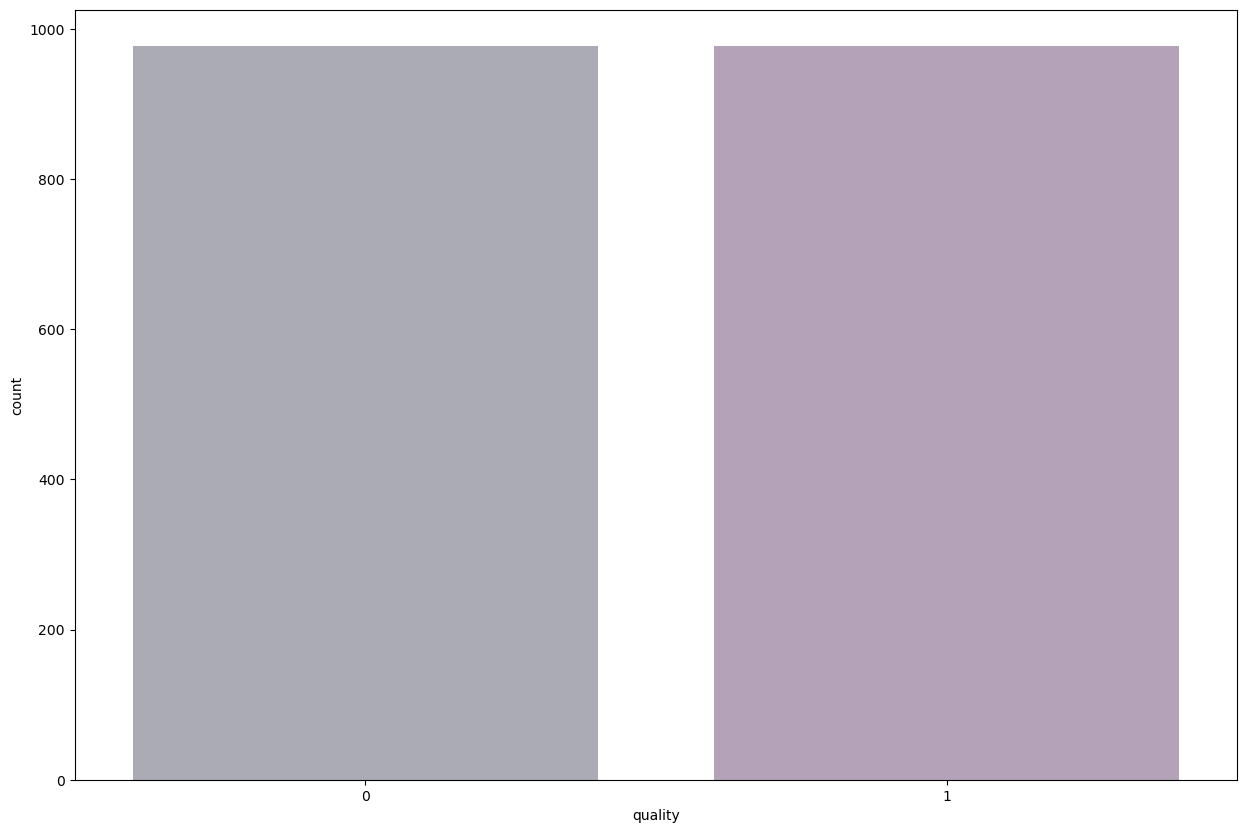

In [70]:
plt.figure(figsize=(15,10))
sns.countplot(x=y_smote)

# Train Test Split

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

# Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg')

In [73]:
model.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [74]:
model.score(X_test, y_test)

0.8228279386712095

In [96]:
lr_pred = model.predict(X_test)

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       287
           1       0.82      0.83      0.83       300

    accuracy                           0.82       587
   macro avg       0.82      0.82      0.82       587
weighted avg       0.82      0.82      0.82       587



In [98]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, lr_pred))
'''            Actual
            Negative       Positive
Predicted     
Negative      TN           FP
Positive      FN           TP'''

[[233  54]
 [ 50 250]]


'            Predicted\n            Positive       Negative\nActual      \nPositive      TP           FN\nNegative      FP           TN'

# Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()

In [81]:
parameters = {'criterion':['gini','entropy','log_loss'],
             'splitter':['best','random'],
             'max_depth':[2,4,6,8],
             'min_samples_split':[2,4,6,8],
             'min_samples_leaf':[1,2,3,4],
             'max_features':['auto','sqrt','log2']}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(dtr, parameters, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print('Grid best parameters are',grid_search.best_params_)

Grid best parameters are {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'splitter': 'best'}


In [84]:
dtr = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],
                            splitter=grid_search.best_params_['splitter'],
                            max_depth=grid_search.best_params_['max_depth'],
                            min_samples_split=grid_search.best_params_['min_samples_split'],
                            min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                            max_features=grid_search.best_params_['max_features'],
                            random_state=42)

In [85]:
dtr.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

In [99]:
dtr_pred = dtr.predict(X_test)

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dtr_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       287
           1       0.84      0.85      0.85       300

    accuracy                           0.84       587
   macro avg       0.84      0.84      0.84       587
weighted avg       0.84      0.84      0.84       587



In [102]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,dtr_pred))

[[239  48]
 [ 44 256]]


# Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfc = RandomForestClassifier()

In [92]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [103]:
rfc_pred = rfc.predict(X_test)

In [104]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       287
           1       0.90      0.93      0.91       300

    accuracy                           0.91       587
   macro avg       0.91      0.91      0.91       587
weighted avg       0.91      0.91      0.91       587



In [95]:
print(confusion_matrix(y_test,rfc_pred))

[[256  31]
 [ 21 279]]


# AdaBoostClassifier

In [106]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

In [107]:
abc.fit(X_train, y_train)

AdaBoostClassifier()

In [108]:
abc_pred = abc.predict(X_test)

In [109]:
print(classification_report(y_test, abc_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       287
           1       0.86      0.88      0.87       300

    accuracy                           0.86       587
   macro avg       0.86      0.86      0.86       587
weighted avg       0.86      0.86      0.86       587



In [110]:
print(confusion_matrix(y_test, abc_pred))

[[243  44]
 [ 37 263]]


# Model Evaluation

Text(0.5, 1.0, 'Confusion Matrix for AdaBoost')

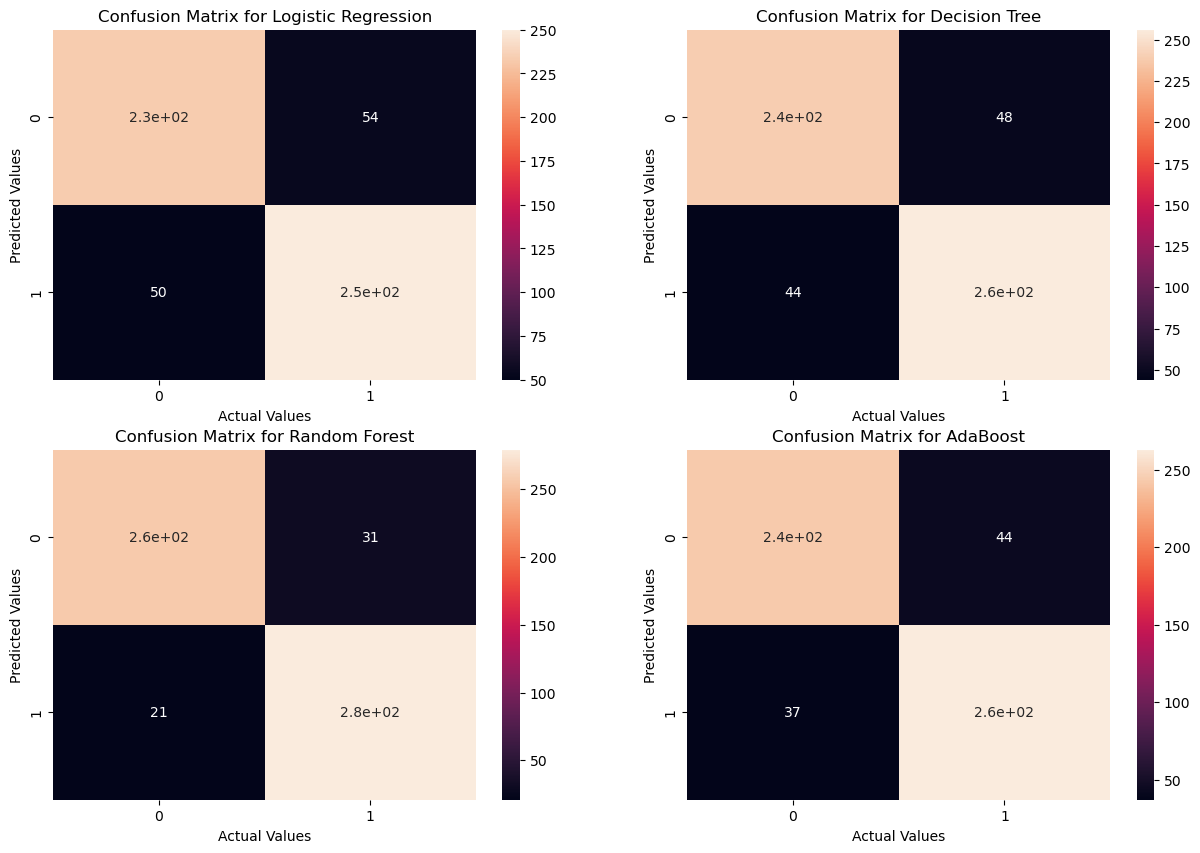

In [111]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.heatmap(confusion_matrix(y_test,lr_pred), annot = True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.subplot(2,2,2)
sns.heatmap(confusion_matrix(y_test,dtr_pred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix for Decision Tree')
plt.subplot(2,2,3)
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix for Random Forest')
plt.subplot(2,2,4)
sns.heatmap(confusion_matrix(y_test, abc_pred),annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix for AdaBoost')

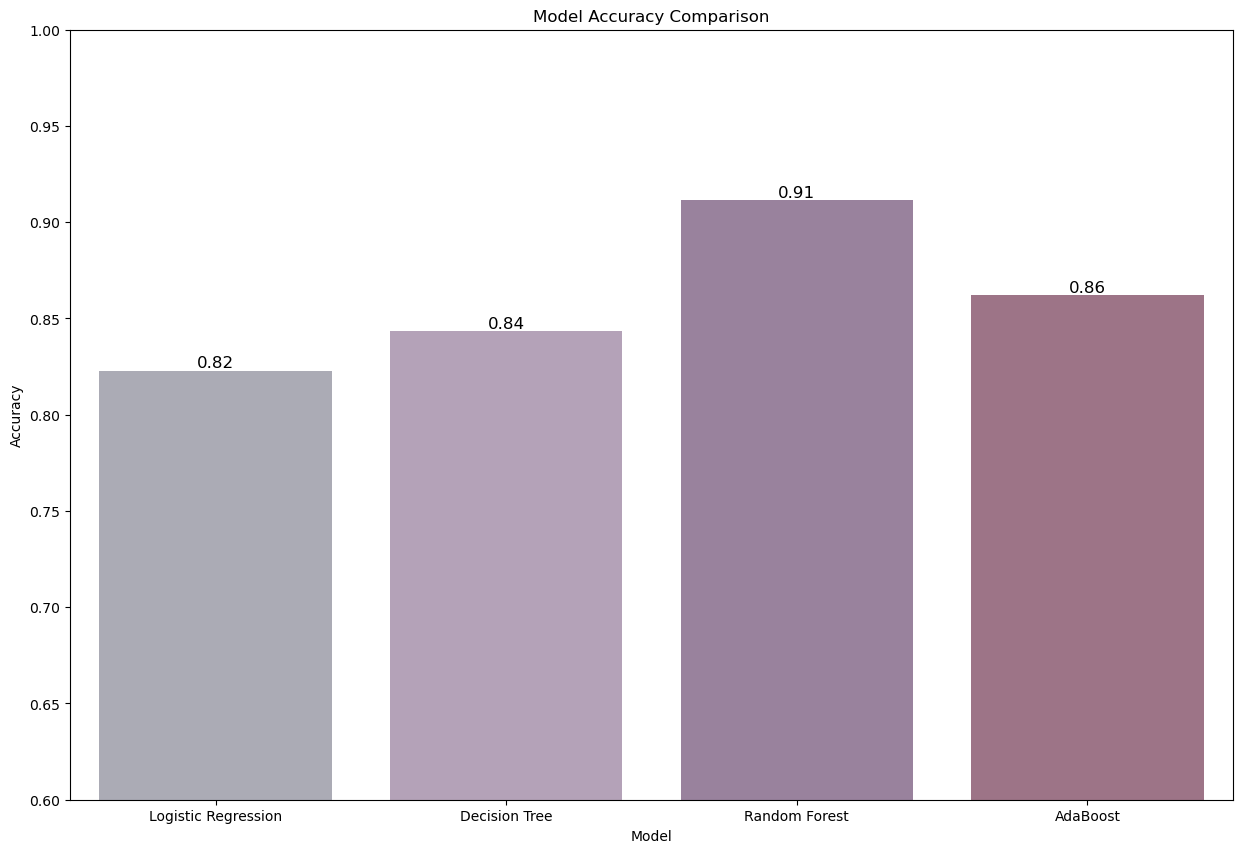

In [118]:
from sklearn.metrics import accuracy_score
models = ['Logistic Regression',
         'Decision Tree',
         'Random Forest',
         'AdaBoost']
accuracy = [accuracy_score(y_test, lr_pred),accuracy_score(y_test,dtr_pred),
           accuracy_score(y_test,rfc_pred),accuracy_score(y_test,abc_pred)]
plt.figure(figsize=(15,10))
barplot=sns.barplot(x=models,y=accuracy)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.6,1)
for index, value in enumerate(accuracy):
    barplot.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)
plt.show()